In [6]:
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scanpy as sc
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy as sp
from sklearn.cluster import KMeans
import matplotlib as mpl

In [2]:
figpath = '/stanley/WangLab/kamal/figures/projects/spin/reviews/gut/utag/'
os.makedirs(figpath, exist_ok=True)
dpi = 300

In [3]:
basepath = '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/'
n_sample_rates = 11
single_cell_results = '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/knn/reconstructions_0.0_50physical_15latent'

In [4]:
radius = 260
k_physical = 50 # approximately; utag used
k_latent = 15

# Load results

In [7]:
param_sets = glob(os.path.join(basepath, f'*{radius}radius_{k_latent}latent*'))
param_sets.sort()
param_sets[0] = single_cell_results
n_params = len(param_sets)
recons = np.zeros((n_params,n_sample_rates))
kmeans_ari = np.zeros((n_params,n_sample_rates))
leiden_ari = np.zeros((n_params,n_sample_rates))

for i in range(n_params):
    outputs = glob(os.path.join(basepath,param_sets[i])+'/*.txt')

    for j in range(len(outputs)):
        split = outputs[j].split('.txt')[0].split('/')[-1].split('_')
        recons[i,j] = float(split[1])
        kmeans_ari[i,j] = float(split[2])
        leiden_ari[i,j] = float(split[3])

In [8]:
param_sets

['/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/knn/reconstructions_0.0_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.1_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.2_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.3_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.4_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.5_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.6_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.7_260radius_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_0.8_260radius_15latent',
 '/stanley

In [9]:
recons = np.ma.masked_equal(recons,0)
kmeans_ari = np.ma.masked_equal(kmeans_ari,0)
leiden_ari = np.ma.masked_equal(leiden_ari,0)

In [10]:
# Multiply by ratio of n_nbrs to normalize to [0,1]
recons *= k_physical/k_latent

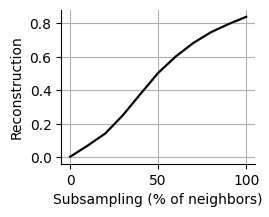

In [11]:
x = np.arange(n_params) * 10
plt.figure(figsize=(2.5,2))

# K-means
std = recons.std(axis=1)
mean = recons.mean(axis=1)
plt.plot(x, mean, color='k')
plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.2)

plt.ylabel('Reconstruction')
plt.xlabel('Subsampling (% of neighbors)')
plt.gca().spines[['top','right']].set_visible(False)
tick_coords = np.arange(0,101,50)
tick_labels = tick_coords
plt.xticks(tick_coords, tick_labels)
# plt.xticks(x,x)
plt.grid()

filename = 'recon_curve.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)
plt.show()

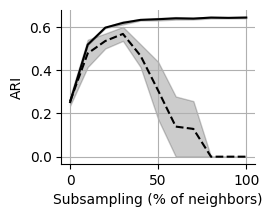

In [12]:
x = np.arange(n_params) * 10
plt.figure(figsize=(2.5,2))

# K-means
std = kmeans_ari.std(axis=1)
mean = kmeans_ari.mean(axis=1)
plt.plot(x, mean, color='k', label='K-means')
plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.2)

# Leiden
std = leiden_ari.std(axis=1)
mean = leiden_ari.mean(axis=1)
plt.plot(x, mean, color='k', label='Leiden', linestyle="--")
plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.2)

plt.ylabel('ARI')
plt.xlabel('Subsampling (% of neighbors)')
# plt.legend(bbox_to_anchor=(-0.14,1.1))
plt.gca().spines[['top','right']].set_visible(False)
tick_coords = np.arange(0,101,50)
tick_labels = tick_coords
plt.xticks(tick_coords, tick_labels)
# plt.xticks(x,x)
plt.grid()

filename = 'ari_vs_subsampling.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)
plt.show()

In [13]:
mean = leiden_ari.mean(axis=1)
print(np.argmax(mean))

3


/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


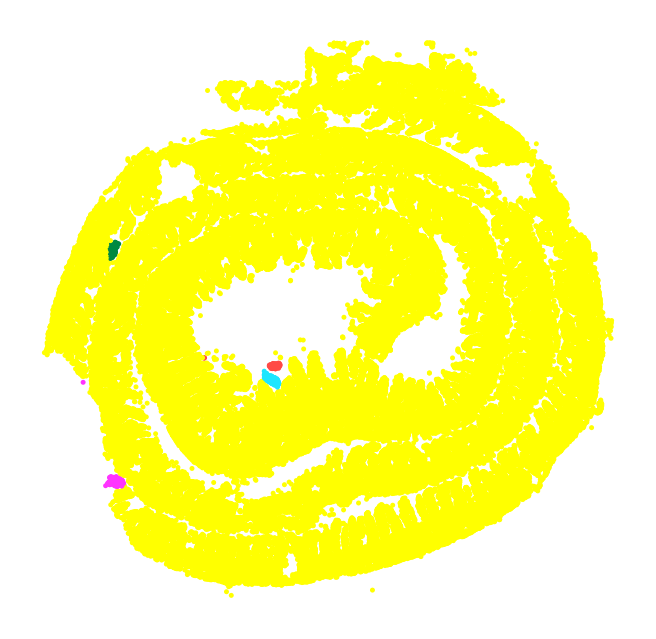

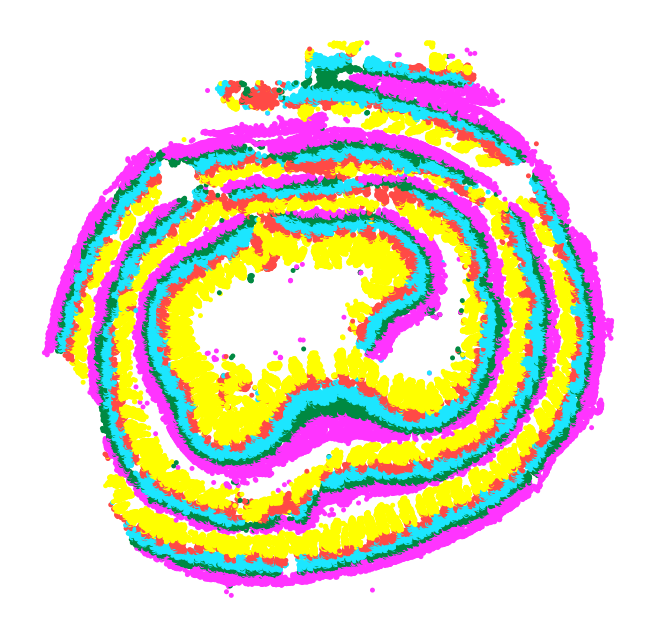

In [14]:
good_sample_rates = [1.0, 0.3]

for sample_rate in good_sample_rates:
    
    path = f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_{sample_rate}_{radius}radius_{k_latent}latent/adata_{sample_rate}.h5ad'
    adata = sc.read_h5ad(path)

    sc.set_figure_params(figsize=(5,5))
    sc.pl.embedding(adata, basis='spatial', color='leiden', s=20, frameon=False, legend_loc=False, title='',
    return_fig=True, palette=sc.pl.palettes.default_102)

    filename = f'leiden_{sample_rate}.png'
    filepath = os.path.join(figpath,filename)
    plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

# UMAP

In [ ]:
good_sample_rates = [1.0, 0.3]

for sample_rate in good_sample_rates:
    
    path = f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_{sample_rate}_{radius}radius_{k_latent}latent/adata_{sample_rate}.h5ad'
    adata = sc.read_h5ad(path)

    sc.tl.umap(adata, neighbors_key='smoothed')

    sc.set_figure_params(figsize=(5,5))
    sc.pl.embedding(adata, basis='X_umap', color='leiden', s=20, frameon=False, legend_loc=False, title='',
    return_fig=True, palette=sc.pl.palettes.default_102)

    filename = f'umap_{sample_rate}.png'
    filepath = os.path.join(figpath,filename)
    plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

    adata.write(path[:-5]+'_umap.h5ad')

# Annotation

## Load

In [7]:
sample_rate = 0.3
path = f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/reconstructions_{sample_rate}_{radius}radius_{k_latent}latent/adata_{sample_rate}_umap.h5ad'
adata = sc.read_h5ad(path)

## Assign labels

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


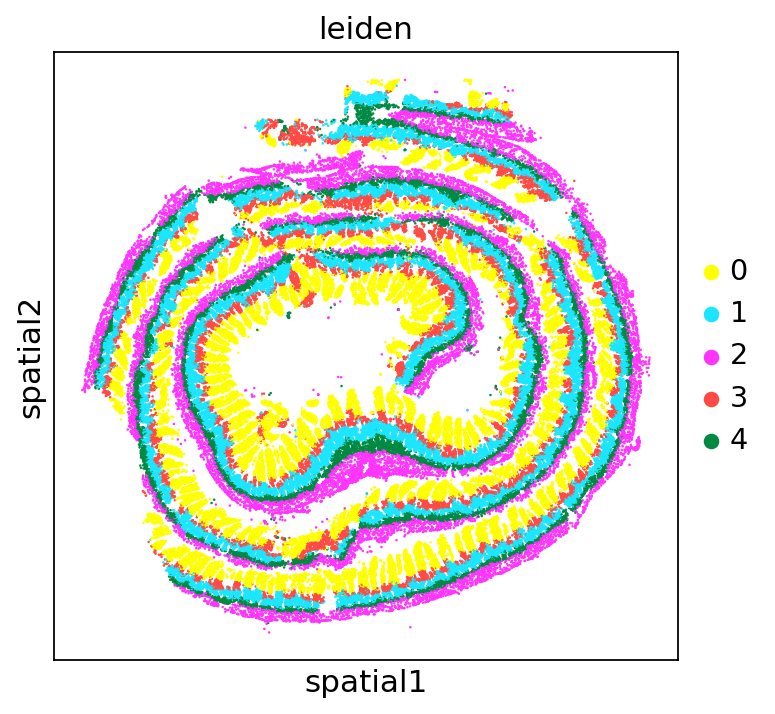

In [8]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='leiden', s=5)

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc

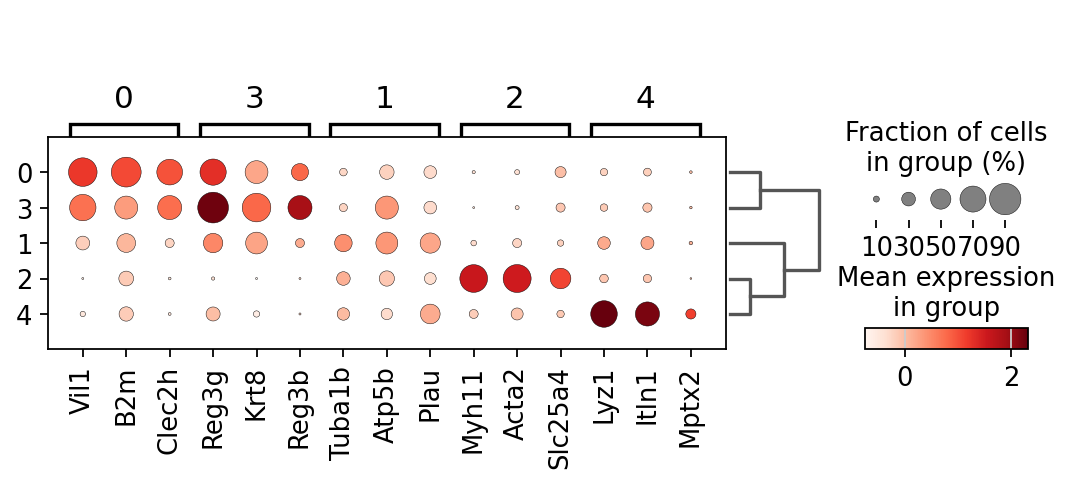

In [9]:
adata.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata, groupby='leiden')
sc.tl.dendrogram(adata, groupby='leiden', use_rep='X_smoothed_pca')
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3)

In [10]:
leiden2region = {
    '0': 'Depth 1',
    '1': 'Depth 3',
    '2': 'Depth 5',
    '3': 'Depth 2',
    '4': 'Depth 4',
}
adata.obs['region'] = adata.obs['leiden'].map(leiden2region)

In [11]:
regions = sorted(adata.obs['region'].unique())
colors = sc.pl.palettes.default_102
palette = {region:color for (region,color) in zip(regions,colors)}

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


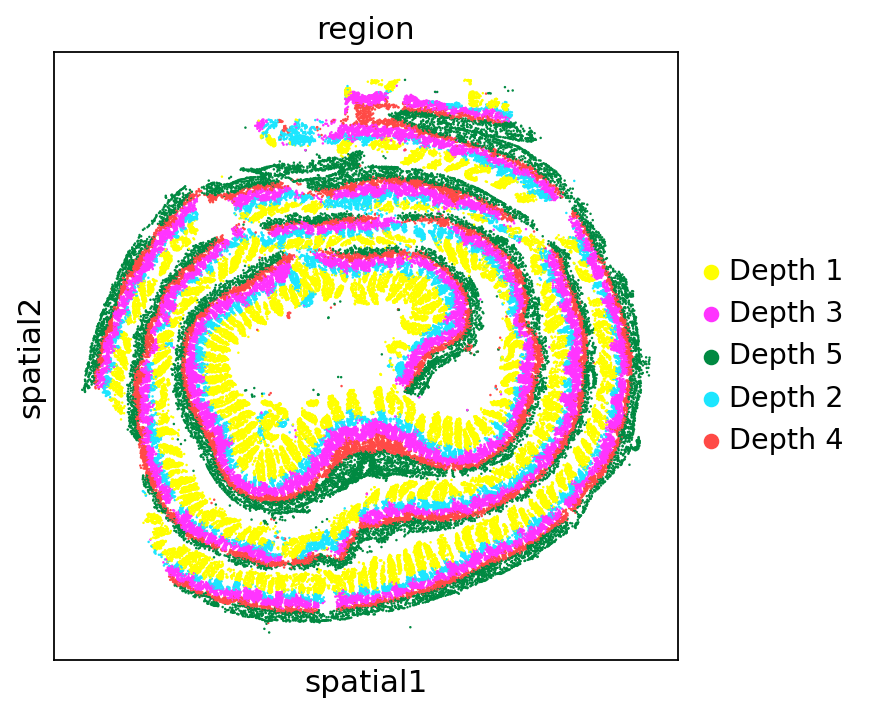

In [12]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='region', palette=palette, s=5)

## Recolor

### Tissue

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


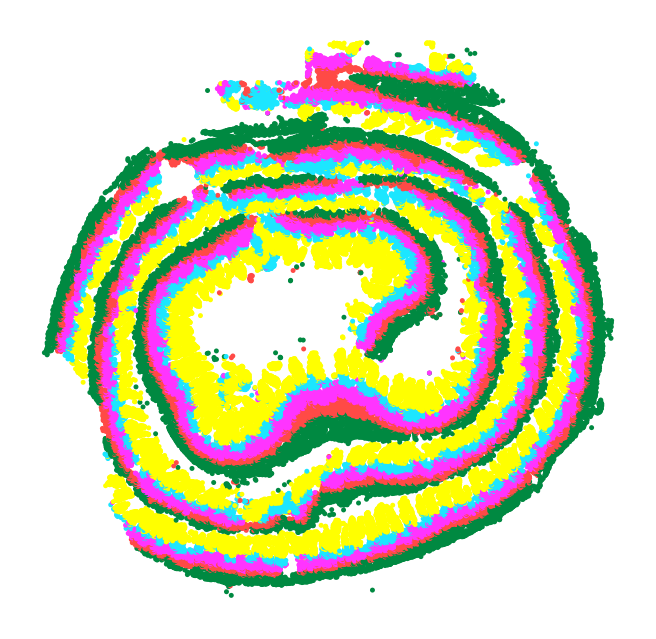

In [13]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='region', s=20, frameon=False, legend_loc=False, title='',
return_fig=True, palette=palette)

filename = f'region_{sample_rate}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

### UMAP

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


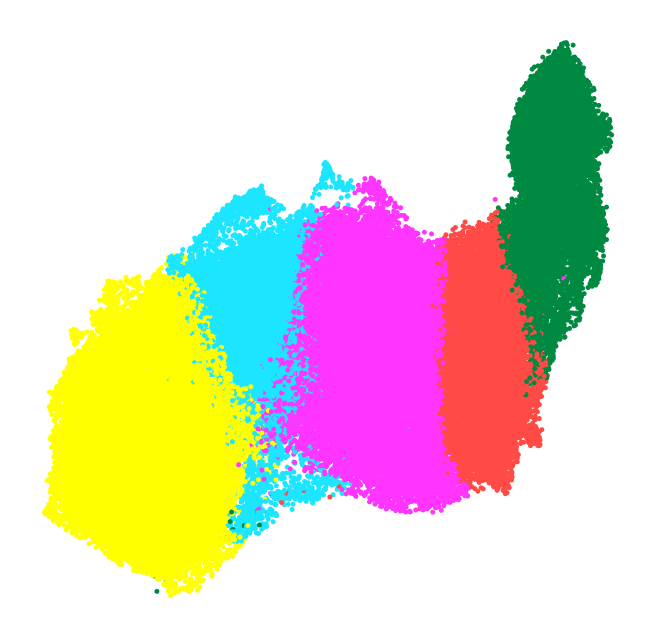

In [14]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=20, frameon=False, legend_loc=False, title='',
return_fig=True, palette=palette)

filename = f'umap_{sample_rate}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

## Save

In [15]:
adata.write(path[:-5]+'_annotated.h5ad')